In [3]:
from uk_covid19 import Cov19API
import json

In [4]:
filters = [
    'areaType=overview' # note each metric-value pair is inside one string
]

In [5]:
structure = {
    "date": "date",
    "cases": "newCasesByPublishDate",
    "hospital": "newAdmissions",
    "deaths": "cumDeaths28DaysByDeathDateRate"    
}

In [6]:
api = Cov19API(filters=filters, structure=structure)

In [7]:
timeseries=api.get_json()
print(timeseries)
print(type(timeseries)) 

{'data': [{'date': '2020-10-21', 'cases': 26688, 'hospital': None, 'deaths': None}, {'date': '2020-10-20', 'cases': 21331, 'hospital': None, 'deaths': 66.1}, {'date': '2020-10-19', 'cases': 18804, 'hospital': None, 'deaths': 66}, {'date': '2020-10-18', 'cases': 16982, 'hospital': None, 'deaths': 65.9}, {'date': '2020-10-17', 'cases': 16171, 'hospital': 996, 'deaths': 65.7}, {'date': '2020-10-16', 'cases': 15650, 'hospital': 874, 'deaths': 65.5}, {'date': '2020-10-15', 'cases': 18980, 'hospital': 1022, 'deaths': 65.3}, {'date': '2020-10-14', 'cases': 19724, 'hospital': 934, 'deaths': 65.1}, {'date': '2020-10-13', 'cases': 17234, 'hospital': 992, 'deaths': 64.9}, {'date': '2020-10-12', 'cases': 13972, 'hospital': 845, 'deaths': 64.8}, {'date': '2020-10-11', 'cases': 12872, 'hospital': 800, 'deaths': 64.6}, {'date': '2020-10-10', 'cases': 15166, 'hospital': 693, 'deaths': 64.4}, {'date': '2020-10-09', 'cases': 13864, 'hospital': 679, 'deaths': 64.3}, {'date': '2020-10-08', 'cases': 17540,

In [9]:
import json
with open("timeseries.json", "wt") as OUTF:
    json.dump(timeseries, OUTF)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import json

%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [11]:
with open("timeseries.json", "rt") as INFILE:
    data=json.load(INFILE)
    
data

{'data': [{'date': '2020-10-21',
   'cases': 26688,
   'hospital': None,
   'deaths': None},
  {'date': '2020-10-20', 'cases': 21331, 'hospital': None, 'deaths': 66.1},
  {'date': '2020-10-19', 'cases': 18804, 'hospital': None, 'deaths': 66},
  {'date': '2020-10-18', 'cases': 16982, 'hospital': None, 'deaths': 65.9},
  {'date': '2020-10-17', 'cases': 16171, 'hospital': 996, 'deaths': 65.7},
  {'date': '2020-10-16', 'cases': 15650, 'hospital': 874, 'deaths': 65.5},
  {'date': '2020-10-15', 'cases': 18980, 'hospital': 1022, 'deaths': 65.3},
  {'date': '2020-10-14', 'cases': 19724, 'hospital': 934, 'deaths': 65.1},
  {'date': '2020-10-13', 'cases': 17234, 'hospital': 992, 'deaths': 64.9},
  {'date': '2020-10-12', 'cases': 13972, 'hospital': 845, 'deaths': 64.8},
  {'date': '2020-10-11', 'cases': 12872, 'hospital': 800, 'deaths': 64.6},
  {'date': '2020-10-10', 'cases': 15166, 'hospital': 693, 'deaths': 64.4},
  {'date': '2020-10-09', 'cases': 13864, 'hospital': 679, 'deaths': 64.3},
  {'d

In [12]:
datalist=data['data']

dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()

def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['cases', 'hospital', 'deaths'])

for entry in datalist:
    date=parse_date(entry['date'])
    for column in ['cases', 'hospital', 'deaths']:
        if pd.isna(timeseriesdf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0
            timeseriesdf.loc[date, column]=value
            
timeseriesdf.fillna(0.0, inplace=True)
            
timeseriesdf


2020-01-03 00:00:00  to  2020-10-21 00:00:00


,cases,hospital,deaths
2020-01-03,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0
2020-01-06,0.0,0.0,0.0
2020-01-07,0.0,0.0,0.0
...,...,...,...
2020-10-17,16171.0,996.0,65.7
2020-10-18,16982.0,0.0,65.9
2020-10-19,18804.0,0.0,66.0
2020-10-20,21331.0,0.0,66.1


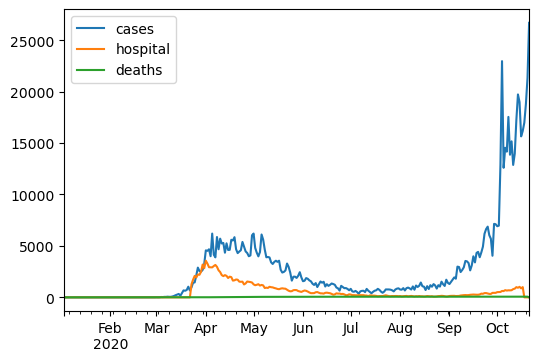

In [13]:
timeseriesdf.plot()

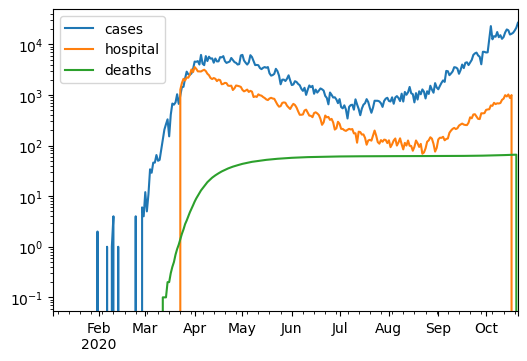

In [14]:
timeseriesdf.plot(logy=True)

In [16]:
timeseriesdf.to_pickle("timeseriesdf.pkl")

### section 3: adding interactive controls

In [17]:
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [18]:
def access_api(button):
    print("I'm downloading data from the API...")
    print("...all done.")
  
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='',
    tooltip='Click to download current Public Health England data',
    icon='download' 
)


apibutton.on_click(access_api)

display(apibutton)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

I'm downloading data from the API...
...all done.


In [19]:
series=wdg.SelectMultiple(
    options=['cases', 'hospital', 'deaths'],
    value=['cases', 'hospital', 'deaths'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
    description='Scale:',
    disabled=False
)

controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

In [21]:
ctrls=wdg.VBox([series, scale])
form=wdg.HBox([graph, ctrls])

display(form)